# GÖZETİMSİZ ÖĞRENME

* Makine öğrenmesi modellerinde bagımlı degiskenin elimizde olmadıgı durumlarda gözlem birimlerinin bir şekilde anlamlı bir hale getirme çabası olarak özetleyebiliriz

# K- MEANS 
* Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır.

In [1]:
# K- Means hiyerarşik olmayan kümeleme yöntemdidir.
# K-MEANS de kümeler kendi içinde homojen kendi aralarında heterojen olacak sekilde ayrılmıstır.

In [2]:
# Elimizdeki gözlem birimlerini segmente etmek istedigimizde kullanırız.


* K- Means Adımları 

    - Adım1: Küme sayısı belirlenir.
    - Adım2:Rastgele k merkez seçilir.
    - Adım3:Her gözlem için k merkezlere uzaklıklar hesaplanır ve gözlemler kendilerine en yakın k merkeze atanır.
    - Adım4: Her gözlem en yakın oldugu merkeze yani kümeye atanır.
    - Adım5:Atama işlemlerinden sonra olusan kümeler için tekrar merkez hesaplamaları yapılır.
    - Adım6:Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamının (total-within-cluster-variation) minimum oldugu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.


In [ ]:
# baslangıcta k sayısı nasıl belirlenecek?


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [30]:
data=pd.read_csv("USArrests.csv")
df=data.copy()
df.head()

# Unnamed olarak gelmiş ama o bir degisken değil

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [31]:
df.index=df.iloc[:,0]# 0.indeksteki degiksnein tüm gözlemlerini al index olarak ata

In [32]:
df.index# df in index degerleri

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [33]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [34]:
df=df.iloc[:,1:5]

In [35]:
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [36]:
#eyalet isimlerini index olarak almamızın nedeni;
# hangi eyaletin kümeleme işlemini sokuldugunu gözlemlemektir.

In [37]:
#del df.index.name ----indexin isimlendirmesinden kurtardık

In [39]:
df.isnull().sum()# icerisinde eksik gözlem var mı

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


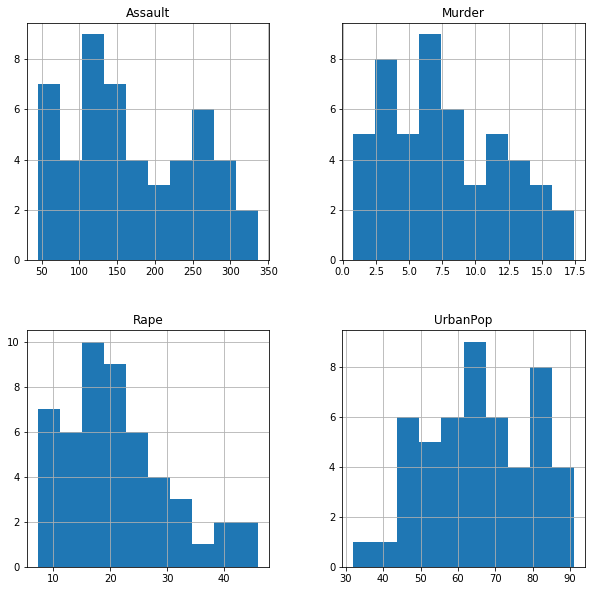

In [42]:
df.hist(figsize=(10,10));

In [43]:
# Genelde dagılımlar iki tepelidir.
# Assault ele alırsak saldırı 3 noktada  yogunlasıyor.Çünkü 3 tepeden olusuyor.
# Peki o 3 tepenin arkasını kimler oluşturuyor.


# K-MEANS MODEL VE GÖRSELLESTİRME

In [45]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [47]:
?kmeans
# kmeans ile ilgili önemli argümanlar
# n_clusters: ön tanımlı  olarak başlayacak olan küme sayısı
# n_init : initalize edilecek olan merkez sayısı(kac kez k adet merkez olusturulacagını ifade eder)

Type:        KMeans
String form:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
File:        c:\users\aayse\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py
Docstring:  
K-Means clustering

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, optional, default: 8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random' or an ndarray}
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_featur

In [50]:
k_fit=kmeans.fit(df)

In [51]:
k_fit.n_clusters

4

In [53]:
k_fit.cluster_centers_# belirlenen nihai cluster merkezleri

# n_clustera 4 verdigimiz icin 4 adet cluster merkezi olustu 

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [55]:
k_fit.labels_# her bir gözlemin sınıf etiketi bilgileri

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

In [56]:
# clusterları görsellestirelim
# 2 sınıf üzerinden görselelstirme yapalım
kmeans=KMeans(n_clusters=2)
k_fit=kmeans.fit(df)

In [58]:
kumeler=k_fit.labels_

*  2 boyutlu görsellestirmek için;
    - 2 tane degisken seçilmeli yada 
    - pca uygulayıp bir boyut indirgemesinden sonra görselelstirme yapılmalıdır

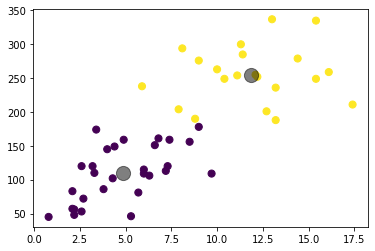

In [64]:
# iki degisken üzerinden görsellestirme yaptık
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kumeler,s=50,cmap="viridis")
# merkezlerini olusturduk
merkezler=k_fit.cluster_centers_
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5)

In [67]:
from mpl_toolkits.mplot3d import Axes3D

In [68]:
# !pip install --upgrade matplotlib
# import mpl_toolkits

In [69]:
kmeans=KMeans(n_clusters=3)
k_fit=kmeans.fit(df)
kumeler=k_fit.labels_

In [73]:
merkezler=kmeans.cluster_centers_

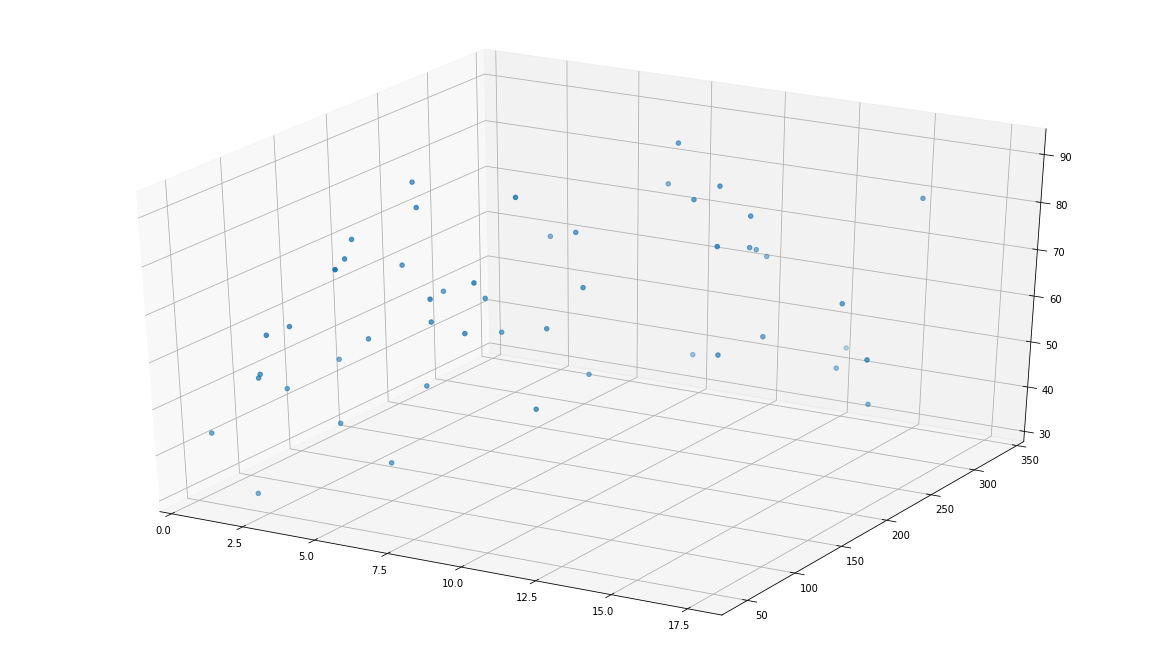

In [75]:
# 3 boyutlu scatter plot olusturulacak
plt.rcParams['figure.figsize']=(16,9)
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]);# veri setinden 3 adet degisken sectik


In [76]:
# 3 boyutlu sctter plot da kümelerin merkezlerinin görsellestirilmesi


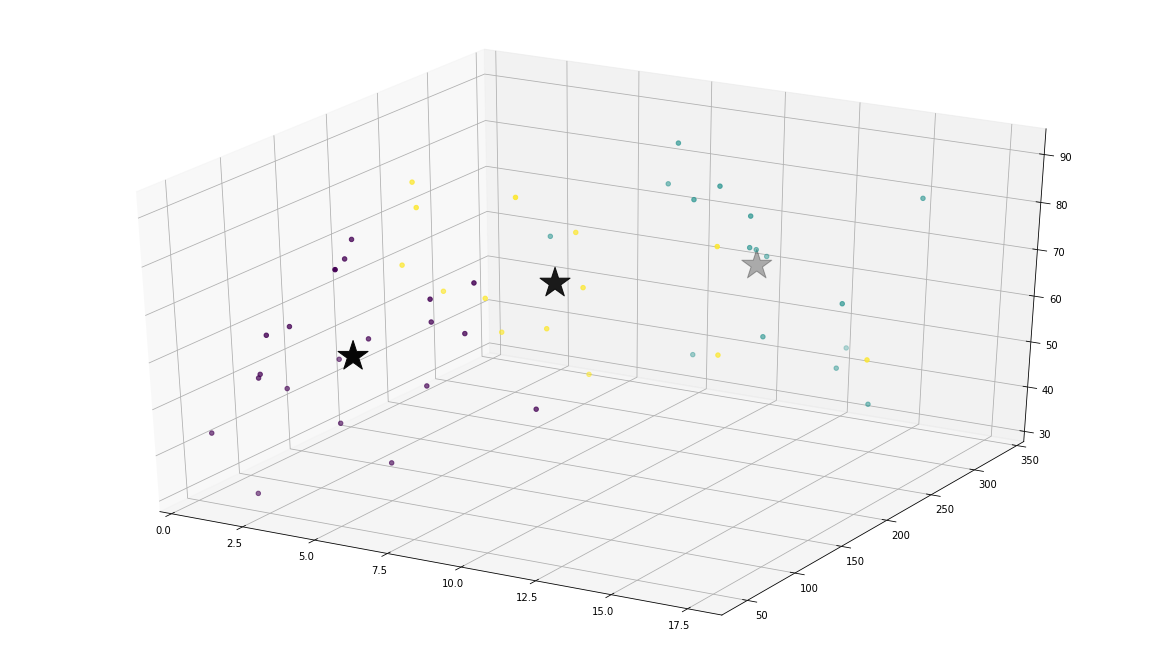

In [77]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=kumeler)
ax.scatter(merkezler[:,0],merkezler[:,1],merkezler[:,2],
          marker="*",# kümelerin merkzleri * ile ifade edilmistir
           c="#050505",
          s=1000)

In [78]:
# kumeler ve gözlem birimleri

In [81]:
kmeans=KMeans(n_clusters=3)
k_fit=kmeans.fit(df)
kumeler=k_fit.labels_

In [83]:
pd.DataFrame({"Eyaletler":df.index,"Kumeler":kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [84]:
df["kume_no"]=kumeler

In [85]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [86]:
df["kume_no"]=df["kume_no"]+1# kumede 0 degerinin olmasını istemedigim icin degistirdim

In [89]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


# KMeans - Elbow ile Optimum Kume Sayısının Belirlenmesi

In [90]:
# Bizim için önemli olan kume içi benzerligin yüksek kumeler arası
# benzerligin düşük olması gerekir.

In [93]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

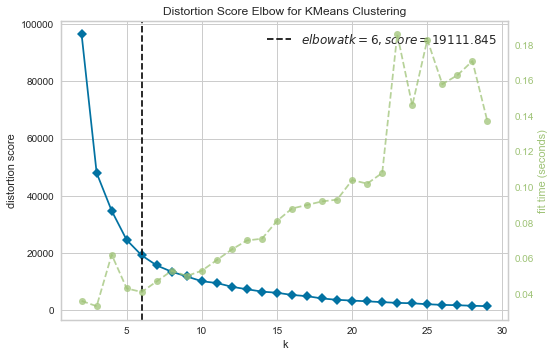

In [96]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(2,30))# 2 den 30 a kadar küme sayılarını dene
visualizer.fit(df)
visualizer.poof()

In [97]:
#BİLGİ:
# segentasyon odaklı kümeleme yapıyorsak;
#yani amacımız müsteri segment etmek,grup segmente etmek,şirket segmente etmek ise
# segment anlamını iyi düşünmek lazım.
# 20 segmentli bir segment segment olmayabilir
# Segment dedigimiz sey 2,3,5 segmentden olur genelde

# yada temelde bir ana kırılım olur.Örnegin;
#Kredi kartı kullananlar ve kredi kullanmayanlar seklinde,
#Kredi kartı kullananların içine girip burda  3,5 segment olusturulabilir.
# Segmentasyon para kaynaklı yada müşteri odaklı bölmek gerekir.

In [ ]:
# Elbow yöntemi ile karar destek noktası olusturmus oluruz.

In [98]:
# final modelinin olusturulması
kmeans=KMeans(n_clusters=4)
k_fit=kmeans.fit(df)
kumeler=k_fit.labels_

In [99]:
pd.DataFrame({"Eyaletler":df.index,"Kumeler":kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,3
7,Delaware,1
8,Florida,1
9,Georgia,0


# Hiyerarşik Kümeleme
* Amac: gözlemleri birbirine olan benzerliklerine göre alt kümelere ayırmaktır.

In [101]:
# Bagımlı degikeni olmayan gözlem birimlerini,birbirlerini benzeterek ,bu benzetmeleri gözlem biirmlerine ayırarak gruplara ayırır

* Hiyerarşik Kümeleme Yöntemleri temelde 2 'ye ayrılır
    - Agglomerative (Birleştirici)
        - Gözlemler birbirine benzerliklerine göre kümelenir.İlk başta gözlem sayısı kadar küme vardır. Birbirlerine benzerliklerine göre birleşerek en son hepsi bir arada olana kadar devam eder.
    - Divisive (Bölümleyici)
        - tüm gözlemler bir aradadır.daha sonra tüm gözlemelr 2 ye ayrılır.daha sonra benzeyip benzemediklerine göre bu ayrılma devam eder

In [1]:
# Hiyerarşik kümelerde küme sayısına Dendogram sonuclarına bakarak karar verilir.
# Hiyerarşik olmayan yöntemlerde küme sayısı uygulama yapılmadan önce berlirlenir.
#Hiyerarşik kümeleme  yöntemlerinde veri seti gözlemler yada degiksneler bazında 
#kümeleme işlemine sokulurken ,hiyerarşik olmayan yöntemlerde sadece gözlemlerin kümelenmesi mümkündür.


* Birleştirici Kümeleme

    - Baslangıçta gözlem sayısı kadar küme vardır.
        - adım1: Veri serinde birbirine yakın olan iki gözlem bulunur.
        - adım2: Bu iki nokta bir araya getirilerek yeni bir gözlem oluşturulur.Yani artık veri seti ilk birleşimdeki gözlemlerden oluşmaktadır.
        - adım3:Aynı işlem tekrarlanarak kadar ykarı dogru çıkılır.Yani iki kümenin birleşiminden olusan bu yeni kümeler aynı sekilde birbirine benzerliklerine göre tekrar birleştirilir.Bu işlem tüm gözlemler tek bir küme de toplanana kadar bu işlemler tekrar edilir.
     - Birbirlerine yakın noktalar uzaklık ölçüleri kullanarak belirlenir.Öklit uzaklıgı ,manhattan uzaklıgı ,korelasyon vs.
   

* Bölümleyici Kümeleme
    - Baslangıcta 1 tane küme vardır,oda tüm veri setidir.
        - Adım1: Tüm gözlemlerin bir arada oldugu küme iki alt kümeye ayrılır.
        - Adım2:Olusan yeni kümeler birbirine benzemeyen alt kümelere bölünür.
        - Adım3:Aynı işlem gözlem sayısı kadar küme elde edilinceye kadar tekrar edilir.

### Hiyerarşik & Hiyerarşik Olmayan & Karar Agacları

* Hiyerarşik yöntemlerde küme sayısına dendogram sonuclarına bakılarak karar verilirken, hiyerarşik olmayan yöntemlerde küme sayısı uygulama yapılmadan önce belirlenebilir.
* Hiyerarşik kümeleme yöntmelerinde veri seti gözlemler yada degiskenler bazında kümeleme işlemine sokulabilirken hiyerarşik olmayan yöntemlerde sadece gözlemlerin kümelenmesi mümkündür.
* Karar agaclarından farkı; karar agaclarında  ayırma işlemi hedef degiskene göre yapılırken burada bagımlı degisken olmadıgı için gözlemler bagımsız degiskenler üzerinden yapılan uzaklık hesaplarına göre kümelere ayrılır


## Hiyerarşik Kümeleme - Uygulama 1

In [3]:
data=pd.read_csv("USArrests.csv")
df=data.copy()
df.index=df.iloc[:,0]
df=df.iloc[:,1:5]
#del df.index.name
df.head()


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
from scipy.cluster.hierarchy import linkage
hc_complete=linkage(df,"complete")
hc_average=linkage(df,"average")
hc_single=linkage(df,"single")

In [10]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

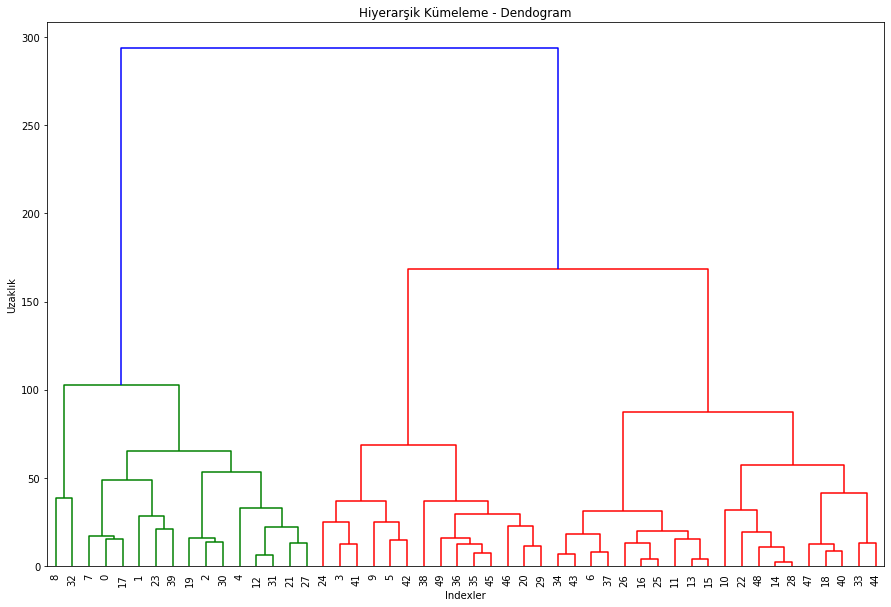

In [11]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram (hc_complete,leaf_font_size=10);

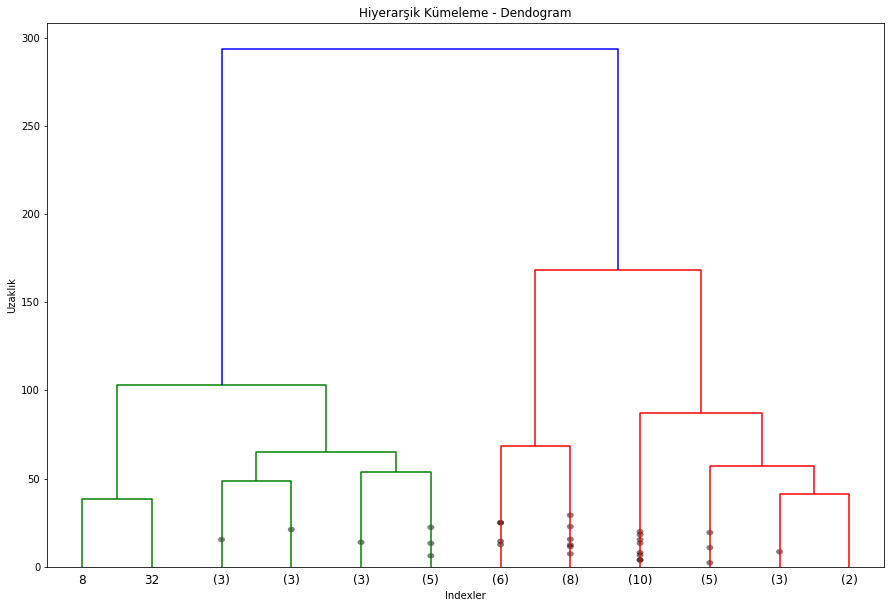

In [12]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram (hc_complete,
           truncate_mode="lastp",
           p=12,# 12 tane küme gösterir ve o 12 kümenin altında kacar tane eleman oldugunu bilgisini veriyor. 
           show_contracted=True);

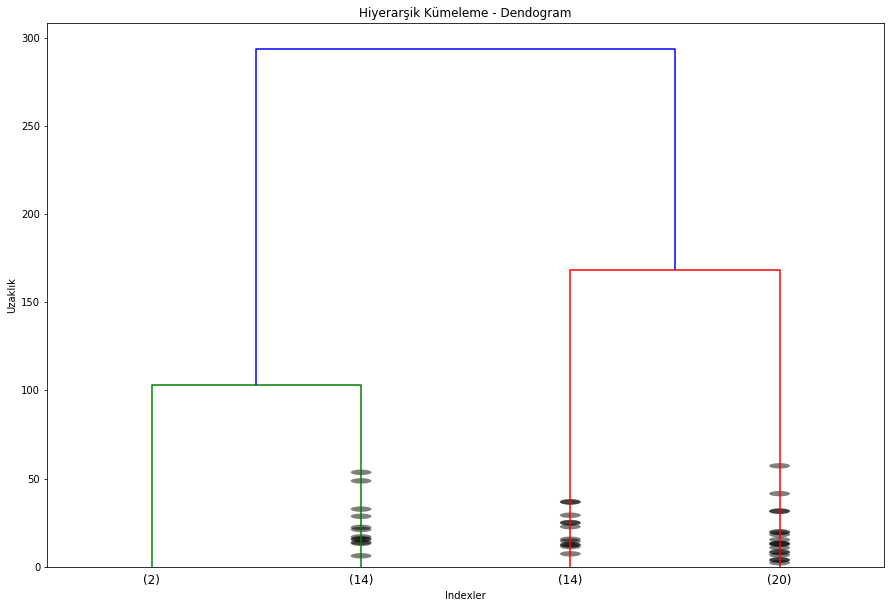

In [14]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram (hc_complete,
           truncate_mode="lastp",
           p=4,# 4 tane küme gösterir ve o 4 kümenin altında kacar tane eleman oldugunu bilgisini veriyor. 
           show_contracted=True);

## Hiyerarşik Kümeleme- Uygulama2

### Optimum Küme Sayısı

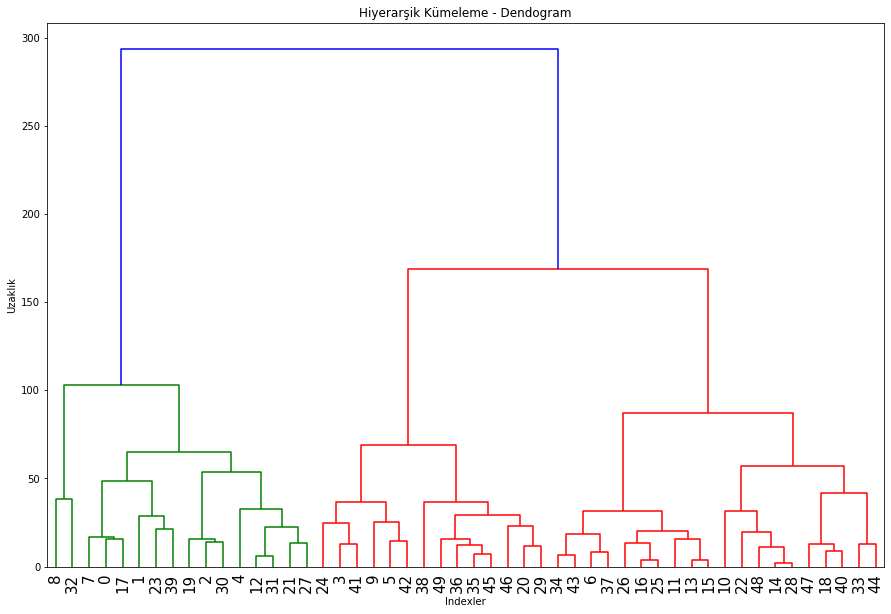

In [20]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15,10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den=dendrogram (hc_complete,leaf_font_size=15);

In [19]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='b',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children.  The top of the U-link indicates a
cluster merge.  The two legs of the U-link indicate which clusters
were merged.  The length of the two legs of the U-link represents
the distance between the child clusters.  It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix enc

In [21]:
from  sklearn.cluster import AgglomerativeClustering

In [29]:
cluster=AgglomerativeClustering(n_clusters=4,
                                affinity="euclidean",
                                linkage="ward")

kumeler=cluster.fit_predict(df)# her bir gözlme birimlerinin sınııf degerleri

In [30]:
pd.DataFrame({"Eyaletler":df.index,"kumeler":kumeler})[0:10]

,Eyaletler,kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [31]:
df["kume_no"]=kumeler

In [32]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# Temel Bilesen Analizi(PCA) - Teori

* Temel fikir,çok degiskenli verinin ana özelliklerini daha az sayıda degisken/bilesen ile temsil etmektir.
* Diğer bir ifade ile;küçük miktarda bir bilgi kaybını göze alıp degisken boyutunu azaltmaktır.

# Temel Bilesen Analizi - PCA - Uygulama

In [35]:
data=pd.read_csv("USArrests.csv")
df=data.copy()
df.index=df.iloc[:,0]
df=df.iloc[:,1:5]
#del df.index.name
df.head()


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [36]:
# Temel bilsen analizini uygulayabilmek için ilk önce degskenlere standartlasştırma işlemi yapılmalıdır.

from sklearn.preprocessing import StandardScaler

In [37]:
df=StandardScaler().fit_transform(df)

In [38]:
df[0:5,0:5]#standartlasştırma işlemi gerceklesşti

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [40]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(df)

In [41]:
bilesen_df=pd.DataFrame(data=pca_fit,columns=["birinci_bilesen","ikinci_bilesen"])

In [42]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [45]:
# gercek veri setinin tasıdıgı bilginin ne kadarını temsil
# ettigi bilgisine erişmek istersek;
pca.explained_variance_ratio_
# 2 tane bilesen oldugu için bu iki bilesenin 
# acıkladıgı varyans oranları ayrı ayrı verilmistir.

array([0.62006039, 0.24744129])

In [ ]:
# iki bilsenei topladıgımızda yaklasık yüzde 80 civarında veri setini
#acıklama oranı vardır.


In [ ]:
# 3 bilesen de gözlemleyelim

In [46]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)

In [47]:
bilesen_df=pd.DataFrame(data=pca_fit,columns=["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])

In [48]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [49]:
pca.explained_variance_ratio_# 3.bilesen veri setini acıklamaktaki basarsı baya düsüktür. 

array([0.62006039, 0.24744129, 0.0891408 ])

In [ ]:
#Genelde calısmalrda 2 ,3 bilesen de yapılır.

* Bilesen sayısını bilmedigimizi ve buna karar vermek istedigimizi düsünelim

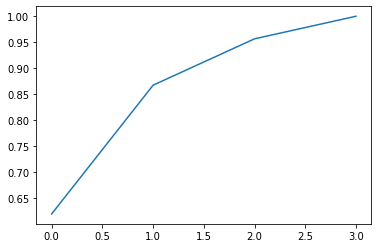

In [52]:
pca=PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# ben veriseti içeirisndeki degiskenligin %95 ini 3 bilesenle  acıklayabiliyorum diye yorumlarız.